## Import Libraries
Loading all libraries to be used

In [16]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


## Web Crawling
Build Data Set from Internet

In [17]:
categories = ['Technology', 'Sports', 'World', 'Business', 'Politics', 'Entertainment', 'Science', 'Travel', 'Fashion', 'Education']

title = []
category = []
content = []

for categoryIndex in categories:
    for i in range(1, 101):
        # example
        # https://inshorts.com/api/en/search/trending_topics/business?page=4&type=NEWS_CATEGORY
        url = f'https://inshorts.com/api/en/search/trending_topics/{categoryIndex.lower()}?page={i}&type=NEWS_CATEGORY'
        response = requests.get(url)
        data = json.loads(response.text)

        for news in data['data']['news_list']:
            if 'news_obj' in news:
                title.append(news['news_obj']['title'])
                category.append(categoryIndex)
                #category.append(news['news_obj']['category_names'])
                content.append(news['news_obj']['content'])

news_df = pd.DataFrame({'title': title, 'category': category, 'content': content})

In [18]:
# title = []
# category = []
# content = []

# with open('bloomberg_quint_news.json', 'r') as file:
#     data = json.load(file)
#     for item in data:
#         title.append(item['title'])
#         category.append(item['category'])
#         content.append(item['short_description'])
                        
# df2 = pd.DataFrame({'title': title, 'content': content, 'category': category})
# df2 = df2[(df2['category'] == 'Technology')]
# df2 = df2.reset_index(drop=True)
# print(len(df2))

# news_df = pd.concat([df1, df2], ignore_index=True)

In [19]:
# print df
print("Data Frame Printout")
print(len(news_df))
print(news_df.category.value_counts())
print(news_df.head(5), "\n")

# to csv
news_df.to_csv('news.csv')

Data Frame Printout
9859
category
World            997
Business         997
Sports           996
Technology       992
Science          992
Education        992
Entertainment    991
Politics         988
Travel           957
Fashion          957
Name: count, dtype: int64
                                               title    category  \
0  29 Nations Unanimously Accept New Delhi’s AI D...  Technology   
1  Deepfakes need societal solution, not just tec...  Technology   
2  I am furious: Elon Musk's mother as she accuse...  Technology   
3  Was Urinated On: Woman Accuses Tech CEO Of Mak...  Technology   
4         M2P Fintech buys Goals101 in software deal  Technology   

                                             content  
0  The Global Partnership on Artificial Intellige...  
1  OpenAI's Vice President of Global Affairs Anna...  
2  Elon Musk's mother Maye Musk has accused US Pr...  
3  A woman has accused a co-founder of a San Fran...  
4  M2P Fintech, a startup that provides softwa

## Text Preprocessing

In [20]:
# Lower Case
news_df['content'] = news_df['content']\
            .apply(lambda x: " ".join(x.lower() for x in x.split()))
news_df['title'] = news_df['title']\
            .apply(lambda x: " ".join(x.lower() for x in x.split()))
print('Lower Case')
print(news_df.head(10))

# to csv
news_df.to_csv('news.csv')

Lower Case
                                               title    category  \
0  29 nations unanimously accept new delhi’s ai d...  Technology   
1  deepfakes need societal solution, not just tec...  Technology   
2  i am furious: elon musk's mother as she accuse...  Technology   
3  was urinated on: woman accuses tech ceo of mak...  Technology   
4         m2p fintech buys goals101 in software deal  Technology   
5             vc firms eye profits on bookmyshow bet  Technology   
6  musk's ai chatbot grok now available in india,...  Technology   
7  why is tesla recalling nearly all its cars sol...  Technology   
8  openai to pay germany's axel springer for news...  Technology   
9  nations unanimously adopt new delhi declaratio...  Technology   

                                             content  
0  the global partnership on artificial intellige...  
1  openai's vice president of global affairs anna...  
2  elon musk's mother maye musk has accused us pr...  
3  a woman has accus

In [21]:
import string

# Removing Punctuation
news_df['content'] = news_df['content']\
            .apply(lambda x: "".join([char for char in x if char not in string.punctuation]))
news_df['content'].head(10)
news_df['title'] = news_df['title']\
            .apply(lambda x: "".join([char for char in x if char not in string.punctuation]))
print('Removing Punctuation')
print(news_df.head(10))

# to csv
news_df.to_csv('news.csv')

Removing Punctuation
                                               title    category  \
0  29 nations unanimously accept new delhi’s ai d...  Technology   
1  deepfakes need societal solution not just tech...  Technology   
2  i am furious elon musks mother as she accuses ...  Technology   
3  was urinated on woman accuses tech ceo of maki...  Technology   
4         m2p fintech buys goals101 in software deal  Technology   
5             vc firms eye profits on bookmyshow bet  Technology   
6  musks ai chatbot grok now available in india 4...  Technology   
7  why is tesla recalling nearly all its cars sol...  Technology   
8  openai to pay germanys axel springer for news ...  Technology   
9  nations unanimously adopt new delhi declaratio...  Technology   

                                             content  
0  the global partnership on artificial intellige...  
1  openais vice president of global affairs anna ...  
2  elon musks mother maye musk has accused us pre...  
3  a woman

In [22]:
# Removing Stopwards
from nltk.corpus import stopwords
stop = stopwords.words('english')
news_df['content'] = news_df['content']\
            .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
news_df['content'].head(10)
news_df['title'] = news_df['title']\
            .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
print(news_df.head(10))

# to csv
news_df.to_csv('news.csv')

                                               title    category  \
0  29 nations unanimously accept new delhi’s ai d...  Technology   
1  deepfakes need societal solution tech solution...  Technology   
2  furious elon musks mother accuses biden target...  Technology   
3   urinated woman accuses tech ceo making sex slave  Technology   
4            m2p fintech buys goals101 software deal  Technology   
5                vc firms eye profits bookmyshow bet  Technology   
6  musks ai chatbot grok available india 46 count...  Technology   
7                tesla recalling nearly cars sold us  Technology   
8  openai pay germanys axel springer news content...  Technology   
9  nations unanimously adopt new delhi declaratio...  Technology   

                                             content  
0  global partnership artificial intelligence gpa...  
1  openais vice president global affairs anna mak...  
2  elon musks mother maye musk accused us preside...  
3  woman accused cofounder san 

In [23]:
# Removing accented characters
import unicodedata
news_df['content'] = news_df['content']\
            .apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore'))
news_df['content'].head(10)
news_df['title'] = news_df['title']\
            .apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore'))
print(news_df.head(10))

# to csv
news_df.to_csv('news.csv')

                                               title    category  \
0  29 nations unanimously accept new delhis ai de...  Technology   
1  deepfakes need societal solution tech solution...  Technology   
2  furious elon musks mother accuses biden target...  Technology   
3   urinated woman accuses tech ceo making sex slave  Technology   
4            m2p fintech buys goals101 software deal  Technology   
5                vc firms eye profits bookmyshow bet  Technology   
6  musks ai chatbot grok available india 46 count...  Technology   
7                tesla recalling nearly cars sold us  Technology   
8  openai pay germanys axel springer news content...  Technology   
9  nations unanimously adopt new delhi declaratio...  Technology   

                                             content  
0  global partnership artificial intelligence gpa...  
1  openais vice president global affairs anna mak...  
2  elon musks mother maye musk accused us preside...  
3  woman accused cofounder san 

In [24]:
# Word Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

print(news_df['content'].iloc[0])
tokensContent = word_tokenize(news_df['content'].iloc[0])
print('Tokens')
print(tokensContent, '\n')

print(news_df['title'].iloc[0])
tokensTitle = word_tokenize(news_df['title'].iloc[0])
print('Tokens')
print(tokensTitle, '\n')
# to csv
news_df.to_csv('news.csv')

global partnership artificial intelligence gpai summit congregation 29 member nations including european union eu unanimously adopted new delhi resolution aims promote collaborative effort member countries ai according niti aayog ai potential contribute 1 tn indias economy 2035
Tokens
['global', 'partnership', 'artificial', 'intelligence', 'gpai', 'summit', 'congregation', '29', 'member', 'nations', 'including', 'european', 'union', 'eu', 'unanimously', 'adopted', 'new', 'delhi', 'resolution', 'aims', 'promote', 'collaborative', 'effort', 'member', 'countries', 'ai', 'according', 'niti', 'aayog', 'ai', 'potential', 'contribute', '1', 'tn', 'indias', 'economy', '2035'] 

29 nations unanimously accept new delhis ai declaration
Tokens
['29', 'nations', 'unanimously', 'accept', 'new', 'delhis', 'ai', 'declaration'] 


[nltk_data] Downloading package punkt to /Users/wing-/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('member', 2), ('ai', 2), ('global', 1), ('partnership', 1), ('artificial', 1), ('intelligence', 1), ('gpai', 1), ('summit', 1), ('congregation', 1), ('29', 1), ('nations', 1), ('including', 1), ('european', 1), ('union', 1), ('eu', 1), ('unanimously', 1), ('adopted', 1), ('new', 1), ('delhi', 1), ('resolution', 1)]


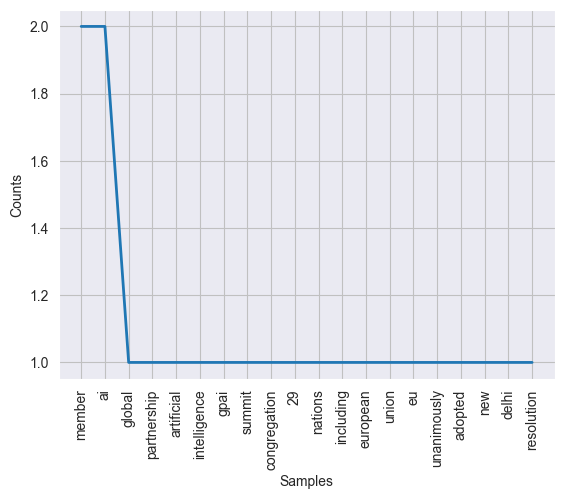

[('29', 1), ('nations', 1), ('unanimously', 1), ('accept', 1), ('new', 1), ('delhis', 1), ('ai', 1), ('declaration', 1)]


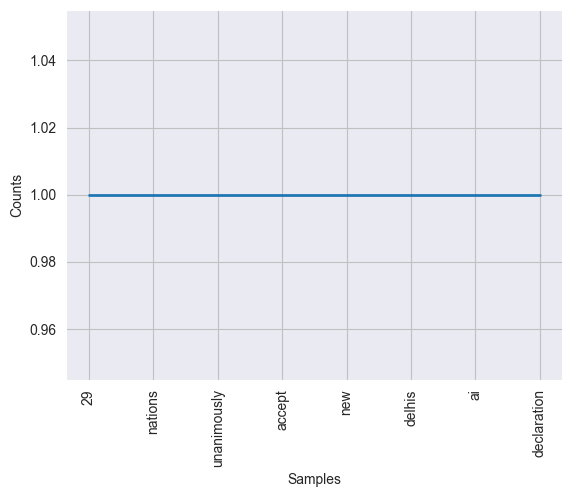

In [25]:
# Frequency Plot
fdist = nltk.FreqDist(tokensContent)
print(fdist.most_common(20))

fdist.plot(20,cumulative=False)
plt.show()

fdist = nltk.FreqDist(tokensTitle)
print(fdist.most_common(10))

fdist.plot(10,cumulative=False)
plt.show()

In [26]:
# Lemmatization
nltk.download('wordnet')
lem = nltk.WordNetLemmatizer()
news_df['content'][:10].apply(lambda x: " ".join([lem.lemmatize(word, 'v') for word in x.split()]))
news_df['title'][:10].apply(lambda x: " ".join([lem.lemmatize(word, 'v') for word in x.split()]))
print('Lemmatization')
print(news_df.head(10))

# to csv
news_df.to_csv('news.csv')

[nltk_data] Downloading package wordnet to /Users/wing-/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatization
                                               title    category  \
0  29 nations unanimously accept new delhis ai de...  Technology   
1  deepfakes need societal solution tech solution...  Technology   
2  furious elon musks mother accuses biden target...  Technology   
3   urinated woman accuses tech ceo making sex slave  Technology   
4            m2p fintech buys goals101 software deal  Technology   
5                vc firms eye profits bookmyshow bet  Technology   
6  musks ai chatbot grok available india 46 count...  Technology   
7                tesla recalling nearly cars sold us  Technology   
8  openai pay germanys axel springer news content...  Technology   
9  nations unanimously adopt new delhi declaratio...  Technology   

                                             content  
0  global partnership artificial intelligence gpa...  
1  openais vice president global affairs anna mak...  
2  elon musks mother maye musk accused us preside...  
3  woman accused 

In [27]:
# Team frequency (TF)
tf1 = (news_df['content'][1:2]).apply(lambda x: pd.Series(x.split(" ")).value_counts()).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1.head()

,words,tf
0,solution,2
1,openais,1
2,require,1
3,work,1
4,donecan,1


In [28]:
# Inverse Document Frequency (IDF)
for i,word in enumerate(tf1['words']):
  try:
    tf1.loc[i, 'idf'] = np.log(news_df.shape[0]/(len(news_df[news_df['content'].str.contains(word)])))
  except:
    pass
tf1.head()

,words,tf,idf
0,solution,2,4.392119
1,openais,1,5.135697
2,require,1,4.298300
3,work,1,2.622460
4,donecan,1,9.196140


In [29]:
# TF-IDF
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.head()
print(tf1.head())

      words  tf       idf     tfidf
0  solution   2  4.392119  8.784238
1   openais   1  5.135697  5.135697
2   require   1  4.298300  4.298300
3      work   1  2.622460  2.622460
4   donecan   1  9.196140  9.196140


### WordCloud


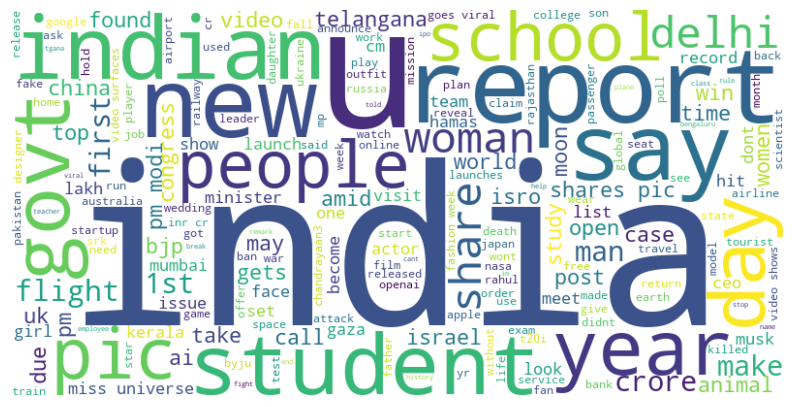

In [30]:
from wordcloud import WordCloud

# Concatenate all news articles into a single string
text = ' '.join(news_df['title'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Sampling data
Count the number of diffrent labels in dataset and plot a pie chart distribution.

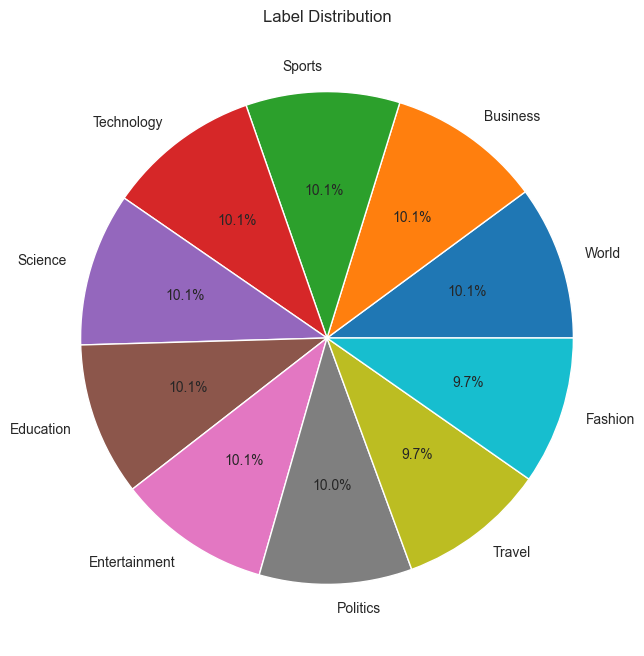

In [31]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each label
label_counts = news_df['category'].value_counts()

# Plot a pie chart of label distribution
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Label Distribution')
plt.show()

## Text Classification and Summarization

Model Evaluation

In [32]:
# Split the data into training and test sets
training_corpus, test_corpus = train_test_split(news_df, test_size=0.2, random_state=42)

# Print the sizes of the training and test sets
print("Training Corpus Size:", len(training_corpus))
print("Test Corpus Size:", len(test_corpus))


# Preparing data for SVM model (using the same training_corpus, test_corpus from 
# naive bayes example)
train_data = []
train_labels = []
for index, row in training_corpus.iterrows():
    train_data.append(row['title'])
    train_labels.append(row['category'])

test_data = []
test_labels = []
for index, row in test_corpus.iterrows():
    test_data.append(row['title'])
    test_labels.append(row['category'])

# Create feature vectors
vectorizer = TfidfVectorizer(min_df=2, max_df=0.8)

# Train the feature vectors
train_vectors = vectorizer.fit_transform(train_data)

# Apply model on test data
test_vectors = vectorizer.transform(test_data)

# Perform classification with SVM, kernel=linear
model = svm.SVC(kernel='linear')
model.fit(train_vectors, train_labels)
prediction = model.predict(test_vectors)
print(prediction)

# Additional testing with new data
extra_test_data = [
    "Australia name playing XI for first Test against Pakistan", #Sports
    "Actress Hilary Duff pregnant with her fourth baby, shares pic", #Entertainment
    "Elon Musk's Tesla recalls two million cars in US over Autopilot defect", #Technology
]

# Convert extra test data to feature vectors
extra_test_vectors = vectorizer.transform(extra_test_data)
# Make predictions on extra test data
extra_prediction = model.predict(extra_test_vectors)
print("Extra Test Prediction:", extra_prediction)

Training Corpus Size: 7887
Test Corpus Size: 1972
['Fashion' 'Business' 'Entertainment' ... 'World' 'Sports' 'Politics']
Extra Test Prediction: ['Sports' 'Entertainment' 'Technology']


In [33]:
print(classification_report(test_labels, prediction))

               precision    recall  f1-score   support

     Business       0.41      0.46      0.44       207
    Education       0.88      0.77      0.82       200
Entertainment       0.70      0.68      0.69       211
      Fashion       0.86      0.82      0.84       190
     Politics       0.80      0.84      0.82       207
      Science       0.86      0.80      0.83       188
       Sports       0.82      0.78      0.80       199
   Technology       0.47      0.49      0.48       204
       Travel       0.80      0.82      0.81       181
        World       0.63      0.68      0.66       185

     accuracy                           0.71      1972
    macro avg       0.72      0.71      0.72      1972
 weighted avg       0.72      0.71      0.71      1972


In [34]:
# show random news and not repeat
selected_news = set()  
def show_random_news(category):
    filtered_df = news_df[news_df['category'] == category]
    available_news = filtered_df[~filtered_df['title'].isin(selected_news)]  
    sample_size = min(5, len(available_news)) 
    random_news = available_news.sample(n=sample_size, replace=False)
    for index, news in random_news.iterrows():
        selected_news.add(news['title'])  
        print("Title:", news['title'])
        print("Category:", news['category'])
        print("Content:", news['content'])
        print("\n")

# Example usage
category = "Technology"
show_random_news(category)

Title: ratan tata shares deepfake video asking people deposit money project
Category: Technology
Content: ratan tata alerted people deepfake video asked people deposit money project get millions messages day asking help youtogether manager sona agarwal launched projectin order get projectyou need deposit minimum amount video wrongly showed tata saying


Title: theyll use teams musk altman joins microsoft fired google meet
Category: Technology
Content: responding satya nadellas tweet sam altman greg brockman joining microsoft elon musk wrote use teams musk apparently referring altman fired openai call google meet several users pointed openais board relies google meet despite microsoft investing 10 billion startup


Title: waycool foods aims break even q4 fy24
Category: Technology
Content: agritech startup waycool foods set raise 40 million funding rights issue lightrock anchor investor round seeing high interest several institutional investors family offices close fully subscribed compa

In [35]:
from youtube_transcript_api import YouTubeTranscriptApi

def generate_transcript(id):
	transcript = YouTubeTranscriptApi.get_transcript(id)
	script = ""

	for text in transcript:
		t = text["text"]
		if t != '[Music]':
			script += t + " "
		
	return script, len(script.split())

# Example usage
url = "https://www.youtube.com/watch?v=PDMIFXW5QB0&ab_channel=BBCNews"
id = url.split('=')[1]

transcript, no_of_words = generate_transcript(id)
print(transcript)

now to the story of a sea monster with 130 razor sharp teeth the biting force of a T-Rex and a skull measuring 2 m it might sound like the stuff of Legend but this creature really did exist around 75 million years ago and it was called plaur and a fossil of its enormous jaws has been now found ofd dorsit Jurassic Coast our science editor Rebecca Morel went for an exclusive look okay oh wow there you go it's huge unveiling a Jurassic sea monster this is the 2 m long skull of a pliosaur one of the most fearsome Predators the planet has ever seen so he's got big teeth excellent for stabbing and killing its prey it doesn't chew its food it just breaks into bits and dig it back to get in and digest the bone and everything huge stes led the efforts to unearth and prepare this ancient aquatic Beast it's what makes this unque unique is it's complete so the lower jaws and the upper skull are meshed together as it would be in life to find that I think worldwide there's hardly any specimens ever 

In [36]:
# user input news url
from newspaper import Article
from transformers import BartTokenizer, BartForConditionalGeneration

def summarize_article(url):
    # Initialize and download the article
    article = Article(url, language="en")
    try:
        article.download()
        article.parse()
        article.nlp()
    except Exception as e:
        return f"Failed to download or parse article: {e}"

    # Extracting information
    title = f'Title: {article.title}'
    authors = f'Authors: {", ".join(article.authors) if article.authors else "Not available"}'
    publish_date = f'Publication Date: {article.publish_date if article.publish_date else "Not available"}'
    summary = f'Summary:{article.summary}'

    return f"{title}\n{authors}\n{publish_date}\nSummary: {summary}"

# Example usage
url = "https://www.bbc.com/news/health-67703066"
print(summarize_article(url))

Title: Smoking decline stalls since Covid as more young people take up the habit - study
Authors: Not available
Publication Date: Not available
Summary: Summary:Based on surveys with 101,960 adults representative of the population, researchers estimated 16.2% smoked in June 2017, falling to 15.1% by the start of the pandemic, in March 2020, but just 15% in August 2022, since when the the slower rate of decline has remained consistent.


In [46]:
from transformers import pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Example usage
ARTICLE = """
A high-profile divorce settlement between a flamboyant Indian textile tycoon, Gautam Singhania, and his wife, Nawaz Modi, could lead to him forfeiting 75% of his $1.4bn (£1.1bn) fortune.

Both Mr Singhania and Ms Modi are board members and promoter shareholders of the publicly listed Raymond Group, one of India's best-known consumer brands.

The estranged fitness coach wife of the industrialist - who is known for his penchant for yachts, fast cars and private jets - is unwilling to settle for lower, a source close to Ms Modi has told the BBC, rebuffing news reports that the couple had initiated more "realistic" settlement talks.

Two family members from either side are mediating the dispute and the 75% figure is still very much on the table, sources have told the BBC.

"She says he has agreed to 75% in front of numerous people - friends, mediators, lawyers and chartered accountants. There's no going back on it," one source said, adding that Ms Modi was insistent that an irrevocable trust should be formed where the wealth was transferred and secured for her two daughters' future.

"Close to 96% of the net worth of the promoters of India's wealthiest families is parked in trusts," said Rishabh Shroff, partner at Cyril Amarchand Mangaldas, a Mumbai law firm. "These structures are increasingly attractive to wealthy business families, to shield their assets and insulate their businesses from insolvency, family or creditor disputes."

While Mr Singhania is reportedly keen on creating a trust where he is the sole trustee and settler, Ms Modi has opposed this proposal.

"Speaking as a neutral third party, I don't think she should agree to a trust structure where she has no voice or say on how it is run or governed. She will want to be a co-trustee with certain rights, along with being a beneficiary," Mr Shroff said.

Indian racer and businessman Gautam Singhania (L) poses with his wife at his success party for the European Ferrari Challenge 2015, in Mumbai on December 1, 2015. AFP PHOTO / AFP / STR (Photo credit should read STR/AFP via Getty Images)
IMAGE SOURCE,GETTY IMAGES
Image caption,
Mr Singhania and Ms Modi in 2015
"Most companies don't survive beyond three generations. Raymond is a fifth-generation business and Nawaz is keen that her daughters have a future in it," a source close to Ms Modi told the BBC.

Ms Modi is also said to be keen to remain a member of the board, and has no objections to her husband managing the business after their divorce.

She has received public support from her father-in-law, veteran businessman Vijaypat Singhania, who has in the past accused his son of driving him out of his own house in 2017, leaving him with little money to survive on - allegations Mr Singhania has previously denied.

Split wide open
The acrimonious feud between the couple first came to light when a video of Ms Modi being denied entry into a company Diwali party went viral in November.

She's since made disturbing allegations of physical assault on her and their minor daughter by the scion of the almost hundred-year-old Raymond Group.

Mr Singhania didn't agree to speak with the BBC about the allegations.

In response to a request for an interview, his spokesperson directed the BBC to his statement which said, "I have chosen not to comment on the reports in media about matters pertaining to my personal life as maintaining the dignity of my family is paramount to me."

Wives fill Indian boardroom quotas
Rising crimes against Indian women in five charts
Ms Modi had told Sangeeta Waddhwani, a celebrity journalist and former executive editor of Hello! India magazine, that she'd suffered "grievous injury" including what she claimed was a broken sacrum bone at the hands of her husband, and had had to get help from the family of Mukesh Ambani - Asia's richest man - to get the police on the scene.

Three non-cognisable offences - where a warrant is needed for arrest and the court's permission is required for an investigation - have been filed against Mr Singhania at two different police stations in Mumbai.

Ms Modi "continues to be restrained from resuming work" because of her physical condition, Ms Waddhwani told the BBC.

Mr Singhania has told employees and shareholders in an internal email - which the BBC has seen - that "it is business as usual" at Raymond even in these difficult times.

The company's shares have begun to rebound after coming under heavy selling pressure when the dispute first became public. But the saga has thrown up uncomfortable questions about domestic abuse allegations at the highest echelons of Indian society, and potential lapses in corporate governance at the country's biggest family-run conglomerates.

Business as usual
In a filing to the exchanges earlier this month, Raymond's independent directors said they were committed to protecting the interest of minority shareholders. They added that disputes between the two promoter directors did not affect the capacity of the chairman and managing director (MD), Gautam Singhania, to manage the affairs of the company. They also said investigations into matrimonial disputes lay "beyond the remit" of the independent directors.

But several questions raised by corporate governance and proxy advisory firms such as Institutional Investor Advisory Services (IIAS) in an open letter to Raymond's board remain unanswered. These include the possibility of criminal liability on the company in the light of these events or the ability of Mr Singhania to discharge his role as chairman and MD amid the personal distractions.

Concerns have also been raised about whether there are adequate controls in place to ensure that company funds - which Ms Modi has alleged were being used by her husband for personal benefit - are being protected. Raymond has not responded to the BBC's question about this charge.

"She has acted as a whistle-blower, so Raymond's audit committee will be mandated to address the issue. They can't hide behind the fact that it is a marital dispute," Hetal Dalal, president of IIAS, told the BBC, saying she was "disappointed" with the company's response.

GREATER NOIDA, INDIA - FEBRUARY 12: Gautam Singhania, Chairman and MD Raymond Ltd, during Ferrari 458 Challenge at Buddh International Circuit in Greater Noida on Tuesday. (Photo by K Asif/The India Today Group via Getty Images)
IMAGE SOURCE,GETTY IMAGES
Image caption,
Mr Singhania is known to have a penchant for fast cars and luxury yachts
The board has appointed a senior independent legal counsel, Berjis Desai, for advice, but sources have told the BBC that Ms Modi isn't happy with the appointment.

While the company's share price decline has been arrested for now - it was down 20% at one point - there are questions about how much of this is because of the exuberance in the broader market vis-a-vis a recovery due to the board's letter.

A dispute between promoters is expected to remain a continuing overhang on the business. A split could lead to a number of scenarios playing out that could impact shareholders, experts say, including a change in voting patterns or even ownership.

A senior corporate lawyer told the BBC that the matter is unlikely to be resolved soon, given that most of Mr Singhania's net worth lies in his 49% stake in Raymond. This person said it would be difficult for the businessman to preserve his shareholding while also making a large monetary settlement without having to borrow or monetise assets.

They should ring-fence the business by immediately "separating themselves" from Mr Singhania, Ms Dalal said, adding that retaining a chairman accused of domestic abuse also raised broader questions about corporate culture within the organisation, which the board needed to address.

'Best-kept secret'
"Violence against women is not an aberration per se in some of the richest families in India," Shobhaa De, a prominent writer and social commentator, told the BBC. "This is corporate India's best-kept secret."

Ms De says she is cynical about how the affair will conclude, given the advantages powerful people have.

"It is easy to silence scrutiny in this country," she said.

Promoters - who typically hold a controlling block of shares in many listed entities in India - are known to exert significant influence in the appointment of board members. This has led many to question how truly independent they are, and their ability to express dissent or fulfil governance obligations.

Ms De thinks it will be a difficult, exhausting fight.

"It remains to be seen how strong Nawaz's negotiating powers are," she says, adding that she thinks "the story of the complete man will remain complete" - a reference to the catchy brand tagline that's defined Raymond since the 1980s.
"""

if len(ARTICLE.split()) > 1024:  # Adjust this limit as needed
        ARTICLE = ARTICLE[:1024]
print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))

[{'summary_text': 'Gautam Singhania and his wife, Nawaz Modi, are divorcing. The industrialist is known for his penchant for yachts, fast cars and private jets. The couple are board members and promoter shareholders of the Raymond Group.'}]


# Multinomial Naive Bayesian
Print the confusion matrix and heat map.

               precision    recall  f1-score   support

     Business       0.46      0.45      0.45       207
    Education       0.81      0.81      0.81       200
Entertainment       0.76      0.69      0.72       211
      Fashion       0.84      0.85      0.85       190
     Politics       0.80      0.86      0.83       207
      Science       0.84      0.87      0.85       188
       Sports       0.85      0.81      0.83       199
   Technology       0.49      0.45      0.47       204
       Travel       0.77      0.84      0.80       181
        World       0.66      0.69      0.67       185

     accuracy                           0.73      1972
    macro avg       0.73      0.73      0.73      1972
 weighted avg       0.73      0.73      0.73      1972
[3 0 2 ... 9 6 4]
['Fashion' 'Business' 'Entertainment' ... 'World' 'Sports' 'Politics']


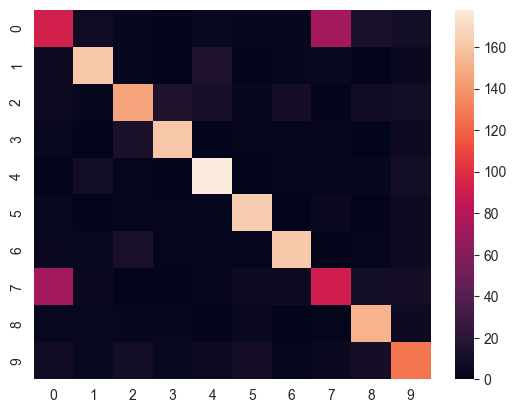

In [38]:
# Assuming you have a DataFrame 'news_df' with 'title' as features and 'category' as labels
X = news_df['title']
y = news_df['category']

# Convert the labels to numerical values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Convert the text content to numerical feature vectors
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

# Split the data into training and test sets
Xtr_count, Xte_count, Ytr, Yte = train_test_split(X_count, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
nb = MultinomialNB()
nb.fit(Xtr_count, Ytr)

# Make predictions with Naive Bayes
pred_nb = nb.predict(Xte_count)

# Print the classification report for Naive Bayes
print(classification_report(Yte, pred_nb, target_names=encoder.classes_))

# Plot the confusion matrix for Naive Bayes
sns.heatmap(confusion_matrix(Yte, pred_nb))

# Create feature vectors using TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(min_df=2, max_df=0.8)
X_tfidf = vectorizer_tfidf.fit_transform(X)

# Split the data into training and test sets
Xtr_tfidf, Xte_tfidf, Ytr, Yte = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train the SVM model
model = svm.SVC(kernel='linear')
model.fit(Xtr_tfidf, Ytr)

# Make predictions with SVM
pred_svm = model.predict(Xte_tfidf)
print(pred_svm)

# Convert numerical predictions back to original categories
pred_categories = encoder.inverse_transform(pred_svm)
print(pred_categories)
